In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
import warnings
warnings.filterwarnings('ignore')

In [83]:
#Read csv files
customer_data = pd.read_csv('musteri_verisi_5000_utf8.csv')
sales_data = pd.read_csv('satis_verisi_5000.csv')

TASK 1 - DATA CLEANING AND MANIPULATION

In [84]:
#Analyze missing data for both table

print("Missing values in Customer Data:\n", customer_data.isnull().sum())
print("Missing values in Sales Data:\n", sales_data.isnull().sum())

Missing values in Customer Data:
 musteri_id         0
isim               0
cinsiyet           0
yas                0
sehir              0
harcama_miktari    0
dtype: int64
Missing values in Sales Data:
 Unnamed: 0      0
tarih           0
ürün_kodu       0
ürün_adi        0
kategori        0
fiyat           0
adet            0
toplam_satis    0
musteri_id      0
dtype: int64


In [85]:
"""
According to the above results, there is no missing data in both tables. Therefore, no data filling process can be done.
"""

'\nAccording to the above results, there is no missing data in both tables. Therefore, no data filling process can be done.\n'

In [86]:
#Outlier detection using IQR Based Filtering
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)  
    Q3 = df[column].quantile(0.75)  
    IQR = Q3 - Q1                   
    lower_bound = Q1 - 1.5 * IQR    
    upper_bound = Q3 + 1.5 * IQR    

    #Find rows with outliers
    outliers = df[(df[column] <= lower_bound) | (df[column] >= upper_bound)]
    print(f"Outliers detected in '{column}': {len(outliers)}")
    print(f"Lower bound= {lower_bound}")
    print(f"Upper bound= {upper_bound}")
    return outliers, lower_bound, upper_bound

In [87]:
print(sales_data["fiyat"].dtype)  # float64 veya int64 olmalı


object


In [88]:
sales_data["fiyat"] = pd.to_numeric(sales_data["fiyat"], errors="coerce")
print(sales_data["fiyat"].isnull().sum())

42


In [89]:
sales_data["fiyat"].fillna(sales_data["fiyat"].mean(), inplace=True)
print(sales_data["fiyat"].isnull().sum())

0


Outliers detected in 'fiyat': 0
Lower bound= -731.8975000000003
Upper bound= 2223.2425000000003


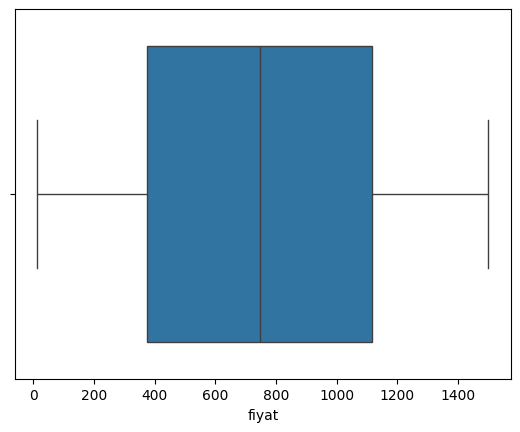

In [90]:
#sales_data["fiyat"] = pd.to_numeric(sales_data["fiyat"], errors="coerce")

price_outliers, price_lower, price_upper = detect_outliers(sales_data, 'fiyat')

sns.boxplot(data=sales_data, x='fiyat')
plt.show()

In [91]:
print(sales_data["fiyat"].isnull().sum())

0


In [92]:
nan_rows = sales_data[sales_data["fiyat"].isnull()]
print(nan_rows)


Empty DataFrame
Columns: [Unnamed: 0, tarih, ürün_kodu, ürün_adi, kategori, fiyat, adet, toplam_satis, musteri_id]
Index: []


Outliers detected in 'adet': 0
Lower bound= -10.0
Upper bound= 30.0


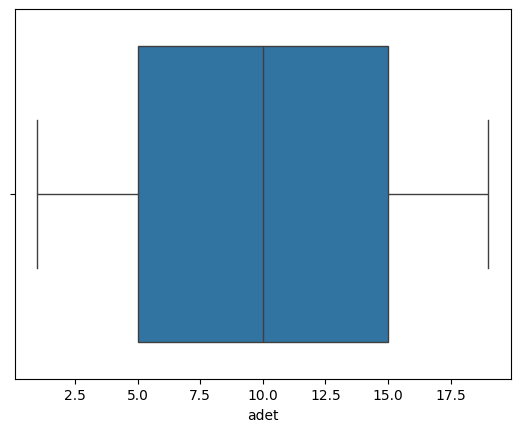

In [93]:
piece_outliers, piece_lower, piece_upper = detect_outliers(sales_data, 'adet')

sns.boxplot(data=sales_data, x='adet')

plt.show()

In [94]:
print(sales_data["toplam_satis"].dtype) 

object


In [95]:
sales_data["toplam_satis"] = pd.to_numeric(sales_data["toplam_satis"], errors="coerce")
print(sales_data["toplam_satis"].isnull().sum())

4


In [96]:
sales_data["toplam_satis"].fillna(sales_data["toplam_satis"].mean(), inplace=True)
print(sales_data["fiyat"].isnull().sum())

0


Outliers detected in 'toplam_satis': 471
Lower bound= -15487.951250000002
Upper bound= 31929.73875


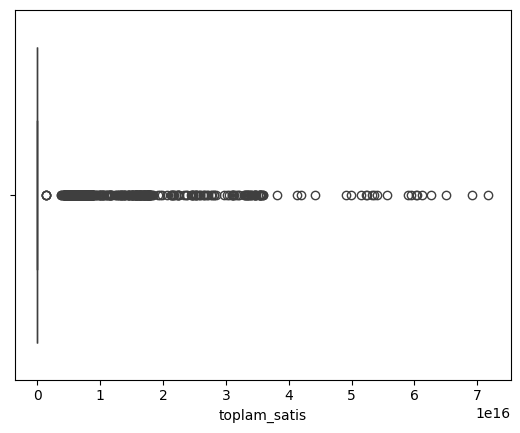

In [97]:
total_sales_outliers, total_sales_lower, total_sales_upper = detect_outliers(sales_data, 'toplam_satis')

sns.boxplot(data=sales_data, x='toplam_satis')
plt.show()

#There are 471 outliers for total sales

Outliers detected in 'harcama_miktari': 0
Lower bound= -2407.415
Upper bound= 7514.085


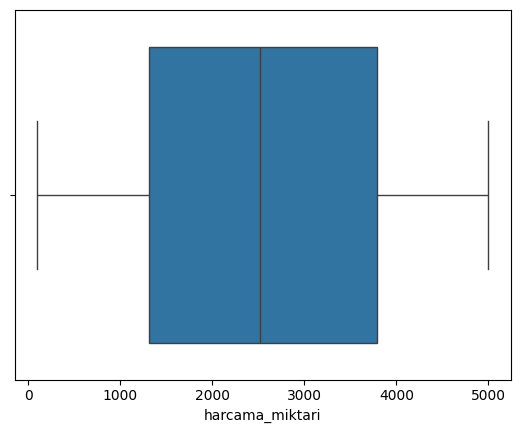

In [98]:
spending_amount_outliers, spending_amount_lower, spending_amount_upper = detect_outliers(customer_data, 'harcama_miktari')

sns.boxplot(data=customer_data, x='harcama_miktari')
plt.show()

Outliers detected in 'yas': 0
Lower bound= -8.0
Upper bound= 96.0


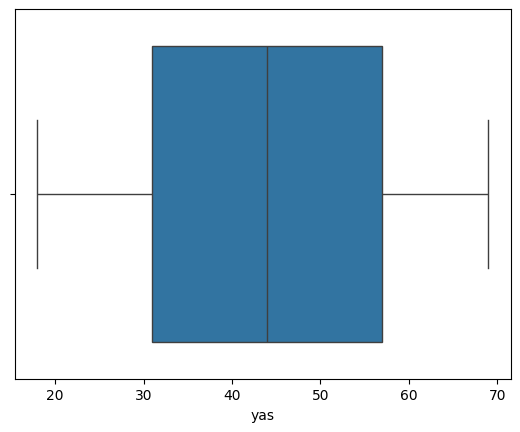

In [99]:
age_outliers, age_lower, age_upper = detect_outliers(customer_data, 'yas')

sns.boxplot(data=customer_data, x='yas')
plt.show()

In [ ]:
#With the winsorization function, outliers are not removed from the data set. Instead, it pulls outlier values ​​to the boundaries.
#If below the lower limit it equals lower_bound, if above the upper limit it equals upper_bound.
def winsorize_outliers(df, column, lower_bound, upper_bound):
    df[column] = df[column].apply(
        lambda x: min(max(x, lower_bound), upper_bound)
    )
    return df

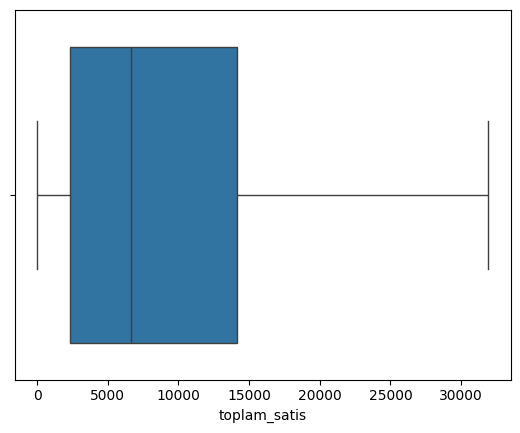

In [101]:
sales_data = winsorize_outliers(sales_data,'toplam_satis', total_sales_lower, total_sales_upper)

sns.boxplot(data=sales_data, x='toplam_satis')
plt.show()


In [102]:
#Merge datasets
merged_data = pd.merge(sales_data, customer_data, on="musteri_id", how="inner")


In [103]:
merged_data.head()

,Unnamed: 0,tarih,ürün_kodu,ürün_adi,kategori,fiyat,adet,toplam_satis,musteri_id,isim,cinsiyet,yas,sehir,harcama_miktari
0,0,2023-07-02,P032,Mouse,Elektronik,"1,207.30",13,"15,694.90",9225,Masume,Kadın,35,İstanbul,"3,588.15"
1,1,2024-02-11,P011,Kalem,Kırtasiye,237.14,16,"3,794.24",3955,Fenni,Kadın,64,Konya,"3,742.46"
2,2,2023-03-06,P024,Bilgisayar,Elektronik,"1,024.29",9,"9,218.61",2367,Feyruz,Kadın,45,Bursa,197.55
3,3,2024-04-11,P063,Klima,Elektronik,"1,477.88",9,"31,929.74",2869,Ülke,Kadın,43,İstanbul,"3,662.18"
4,4,2024-01-08,P063,Klima,Elektronik,949.43,19,"18,039.17",9724,Tonguç,Erkek,41,Bursa,"2,536.20"


In [104]:
#Save merged dataset
merged_data.to_csv("merged_data.csv", index=False)

TASK 2: TIME SERIES ANALYSIS
Since there were no customer details in the analyses in this task, the sales_dataset was used instead of merged_data.

In [105]:
#Convert date column to datatime format
sales_data["tarih"] = pd.to_datetime(sales_data["tarih"])

#Since time-based operations cannot be performed when the dates are not correct,
#conversion was made to the appropriate format.


#resample function is used for time series data


In [106]:
#Start and end date value of sales data
start_date = sales_data["tarih"].min()
end_date = sales_data["tarih"].max()

print(f"Start date: {start_date}")
print(f"End date: {end_date}")

Start date: 2022-11-06 00:00:00
End date: 2024-11-05 00:00:00


In [107]:
#Find the dates of the first and last sales days of each month
monthly_first_last_days = sales_data.groupby(sales_data["tarih"].dt.to_period("M")).agg(
    first_day=("tarih", "min"),
    last_day=("tarih",  "max")
)

#Find the names of the first and last sales days of each month
monthly_first_last_days["first_day_name"] = monthly_first_last_days["first_day"].dt.day_name()
monthly_first_last_days["last_day_name"] = monthly_first_last_days["last_day"].dt.day_name()

print(f"First and Last Sales Days of each Month \n{monthly_first_last_days}")

First and Last Sales Days of each Month 
         first_day   last_day first_day_name last_day_name
tarih                                                     
2022-11 2022-11-06 2022-11-30         Sunday     Wednesday
2022-12 2022-12-01 2022-12-31       Thursday      Saturday
2023-01 2023-01-01 2023-01-31         Sunday       Tuesday
2023-02 2023-02-01 2023-02-28      Wednesday       Tuesday
2023-03 2023-03-01 2023-03-31      Wednesday        Friday
2023-04 2023-04-01 2023-04-30       Saturday        Sunday
2023-05 2023-05-01 2023-05-31         Monday     Wednesday
2023-06 2023-06-01 2023-06-30       Thursday        Friday
2023-07 2023-07-01 2023-07-31       Saturday        Monday
2023-08 2023-08-01 2023-08-31        Tuesday      Thursday
2023-09 2023-09-01 2023-09-30         Friday      Saturday
2023-10 2023-10-01 2023-10-31         Sunday       Tuesday
2023-11 2023-11-01 2023-11-30      Wednesday      Thursday
2023-12 2023-12-01 2023-12-31         Friday        Sunday
2024-01 2024-01

In [108]:
#Weekly product sales quantity analysis for date
weekly_product_sales_quantity = sales_data.resample("W", on="tarih")["adet"].sum() 
print(f"Weekly Product Sales Quantity \n{weekly_product_sales_quantity}")

Weekly Product Sales Quantity 
tarih
2022-11-06     57
2022-11-13    428
2022-11-20    455
2022-11-27    459
2022-12-04    518
             ... 
2024-10-13    522
2024-10-20    454
2024-10-27    641
2024-11-03    472
2024-11-10     72
Freq: W-SUN, Name: adet, Length: 106, dtype: int64


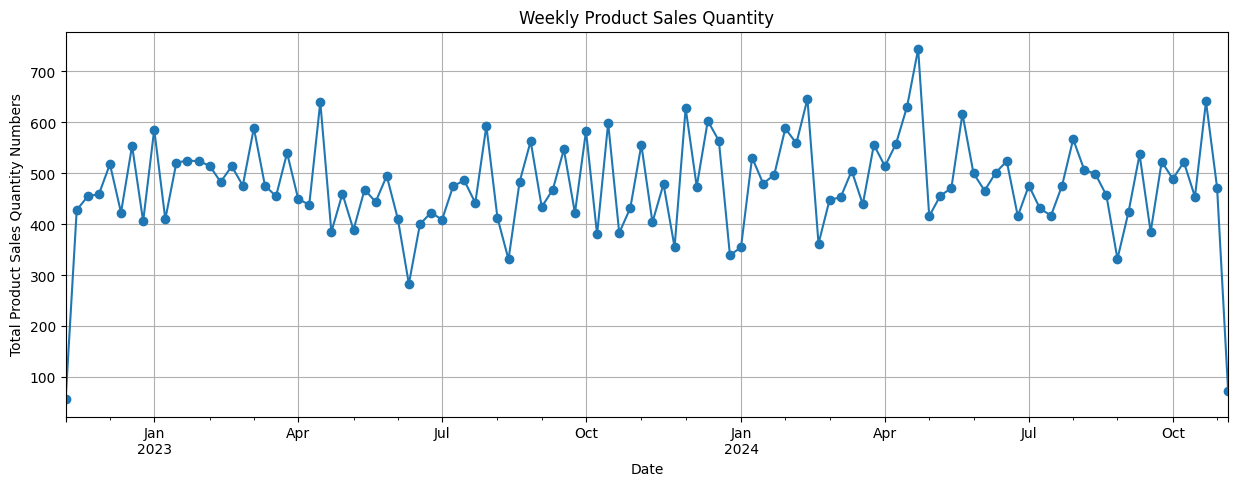

In [109]:
weekly_product_sales_quantity.plot(kind="line",title="Weekly Product Sales Quantity", figsize=(15, 5), marker="o")
plt.ylabel("Total Product Sales Quantity Numbers")
plt.xlabel("Date")
plt.grid()
plt.show()

In [110]:
#Weekly total sales analysis for date
weekly_total_sales = sales_data.resample("W", on="tarih")["toplam_satis"].sum()     #resample function is used for time series data
print(f"Weekly Total Sales \n {weekly_total_sales}")

Weekly Total Sales 
 tarih
2022-11-06    80,413.81
2022-11-13   321,304.89
2022-11-20   422,979.22
2022-11-27   496,887.81
2022-12-04   448,315.07
                ...    
2024-10-13   420,426.09
2024-10-20   486,147.98
2024-10-27   463,931.00
2024-11-03   492,471.28
2024-11-10    70,866.81
Freq: W-SUN, Name: toplam_satis, Length: 106, dtype: float64


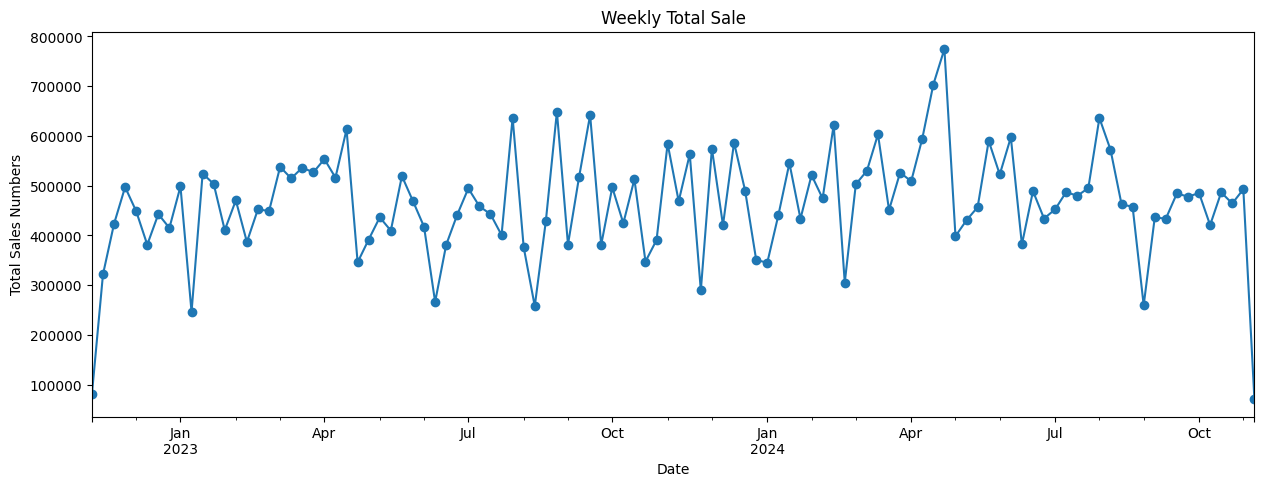

In [111]:
weekly_total_sales.plot(kind="line", title="Weekly Total Sale",  marker="o", figsize=(15,5))   #(kind="line",title="Weekly Total Sales", figsize=(15, 5), marker="o")
plt.ylabel("Total Sales Numbers")
plt.xlabel("Date")
plt.show()

In [112]:
#Monthly product sales for date
monthly_product_sales_quantity = sales_data.resample("ME", on="tarih")["adet"].sum()  #Because of future warnings, used ME instead of M
print(f"Monthly Product Sales Quantity \n {monthly_product_sales_quantity}")

Monthly Product Sales Quantity 
 tarih
2022-11-30    1618
2022-12-31    2189
2023-01-31    2217
2023-02-28    2003
2023-03-31    2210
2023-04-30    2050
2023-05-31    2009
2023-06-30    1507
2023-07-31    2260
2023-08-31    1932
2023-09-30    2169
2023-10-31    2001
2023-11-30    2078
2023-12-31    2202
2024-01-31    2147
2024-02-29    2061
2024-03-31    2211
2024-04-30    2539
2024-05-31    2295
2024-06-30    1980
2024-07-31    2083
2024-08-31    2068
2024-09-30    1939
2024-10-31    2340
2024-11-30     251
Freq: ME, Name: adet, dtype: int64


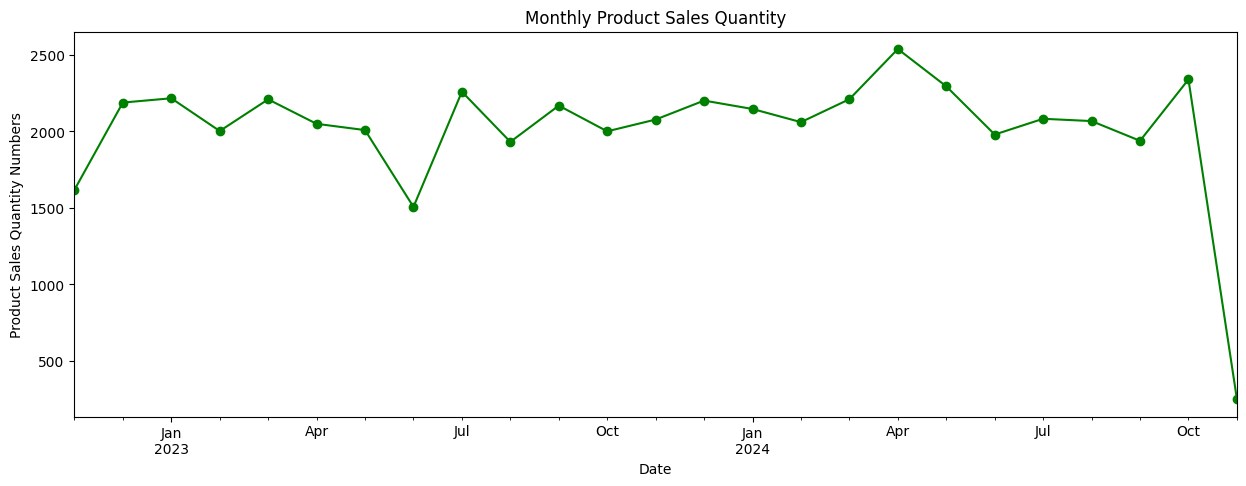

In [113]:
monthly_product_sales_quantity.plot(title="Monthly Product Sales Quantity", marker="o", color= "green", figsize=(15,5))
plt.xlabel("Date")
plt.ylabel("Product Sales Quantity Numbers")
plt.show()

In [114]:
#Monthly total sales for date
pd.options.display.float_format = '{:,.2f}'.format

monthly_total_sales = sales_data.resample("ME", on="tarih")["toplam_satis"].sum()  #Because of future warnings, used ME instead of M
print(f"Monthly Total Sales \n {monthly_total_sales}")

Monthly Total Sales 
 tarih
2022-11-30   1,497,558.40
2022-12-31   1,952,241.32
2023-01-31   1,860,644.17
2023-02-28   1,780,181.10
2023-03-31   2,290,824.37
2023-04-30   2,098,421.19
2023-05-31   2,041,827.64
2023-06-30   1,542,675.42
2023-07-31   2,226,249.14
2023-08-31   1,816,935.24
2023-09-30   2,196,992.47
2023-10-31   1,981,195.00
2023-11-30   2,044,977.00
2023-12-31   2,046,088.83
2024-01-31   2,062,716.23
2024-02-29   1,839,519.87
2024-03-31   2,394,158.21
2024-04-30   2,649,684.91
2024-05-31   2,269,056.58
2024-06-30   1,958,899.34
2024-07-31   2,227,407.02
2024-08-31   2,063,106.49
2024-09-30   1,897,379.38
2024-10-31   2,084,085.08
2024-11-30     277,601.82
Freq: ME, Name: toplam_satis, dtype: float64


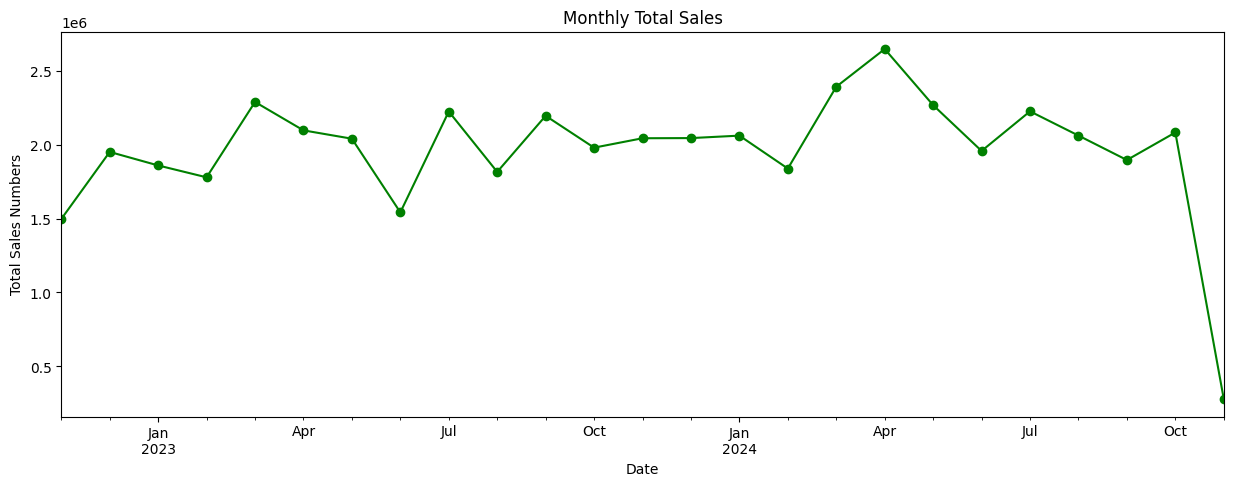

In [115]:
monthly_total_sales.plot(title="Monthly Total Sales", marker="o", color= "green", figsize=(15,5))
plt.xlabel("Date")
plt.ylabel("Total Sales Numbers")
plt.show()

In [116]:
#The amount of increase or decrease compared to the previous month for product sales quantity
monthly_product_sales_quantity_diff = monthly_product_sales_quantity.diff()  
print(f"Monthly Product Sales Quantity Changes \n {monthly_product_sales_quantity_diff}")


#Since there is no previous data in the first month, the change rate appears as 0

Monthly Product Sales Quantity Changes 
 tarih
2022-11-30         NaN
2022-12-31      571.00
2023-01-31       28.00
2023-02-28     -214.00
2023-03-31      207.00
2023-04-30     -160.00
2023-05-31      -41.00
2023-06-30     -502.00
2023-07-31      753.00
2023-08-31     -328.00
2023-09-30      237.00
2023-10-31     -168.00
2023-11-30       77.00
2023-12-31      124.00
2024-01-31      -55.00
2024-02-29      -86.00
2024-03-31      150.00
2024-04-30      328.00
2024-05-31     -244.00
2024-06-30     -315.00
2024-07-31      103.00
2024-08-31      -15.00
2024-09-30     -129.00
2024-10-31      401.00
2024-11-30   -2,089.00
Freq: ME, Name: adet, dtype: float64


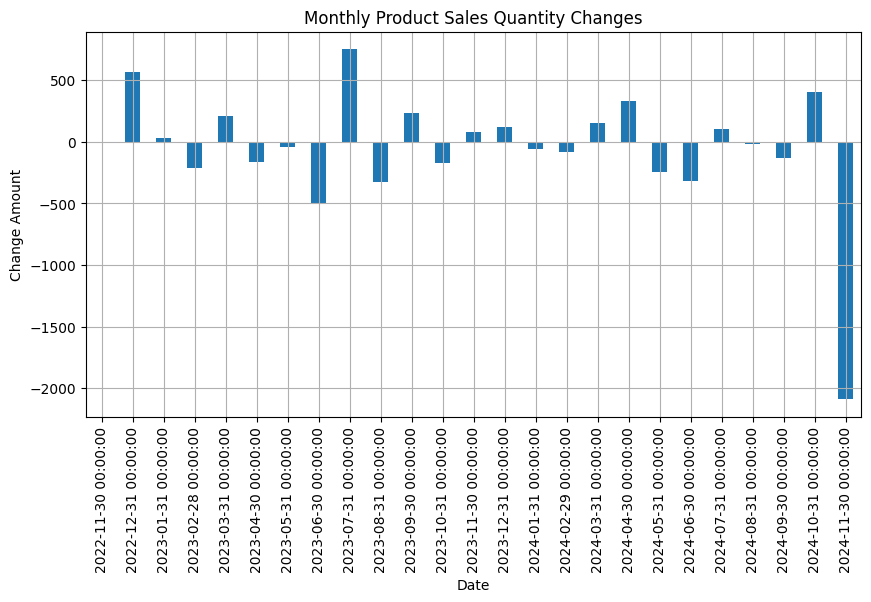

In [117]:
monthly_product_sales_quantity_diff.plot(kind="bar", figsize=(10, 5), title="Monthly Product Sales Quantity Changes")
plt.ylabel("Change Amount")
plt.xlabel("Date")
plt.grid()
plt.show()

In [118]:
#The percentage change of increase or decrease compared to the previous month for product sales quantity
monthly_product_sales_quantity_percentage = monthly_product_sales_quantity.pct_change() * 100
print(f"Monthly Sales Unit Change Percentage \n {monthly_product_sales_quantity_percentage}")

#Since there is no previous data in the first month, the change rate appears as 0

Monthly Sales Unit Change Percentage 
 tarih
2022-11-30      NaN
2022-12-31    35.29
2023-01-31     1.28
2023-02-28    -9.65
2023-03-31    10.33
2023-04-30    -7.24
2023-05-31    -2.00
2023-06-30   -24.99
2023-07-31    49.97
2023-08-31   -14.51
2023-09-30    12.27
2023-10-31    -7.75
2023-11-30     3.85
2023-12-31     5.97
2024-01-31    -2.50
2024-02-29    -4.01
2024-03-31     7.28
2024-04-30    14.83
2024-05-31    -9.61
2024-06-30   -13.73
2024-07-31     5.20
2024-08-31    -0.72
2024-09-30    -6.24
2024-10-31    20.68
2024-11-30   -89.27
Freq: ME, Name: adet, dtype: float64


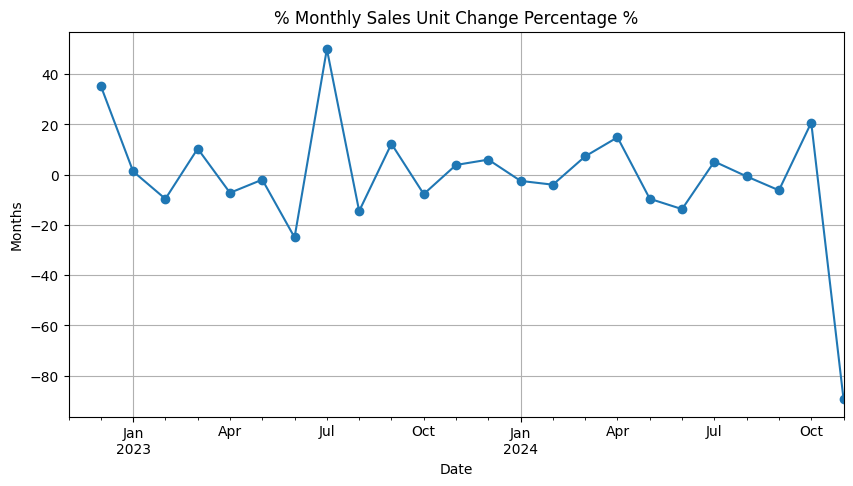

In [119]:
monthly_product_sales_quantity_percentage.plot(kind="line", title="% Monthly Sales Unit Change Percentage %", marker="o", figsize=(10,5))
plt.xlabel("Date")
plt.ylabel("Months")
plt.grid()
plt.show()

In [120]:
#The amount of increase or decrease compared to the previous month for total sales
monthly_total_sales_diff = monthly_total_sales.diff()  
print(f"Monthly Total Sale Changes \n {monthly_total_sales_diff}")

#Since there is no previous data in the first month, the change rate appears as 0

Monthly Total Sale Changes 
 tarih
2022-11-30             NaN
2022-12-31      454,682.92
2023-01-31      -91,597.15
2023-02-28      -80,463.06
2023-03-31      510,643.26
2023-04-30     -192,403.18
2023-05-31      -56,593.55
2023-06-30     -499,152.22
2023-07-31      683,573.72
2023-08-31     -409,313.90
2023-09-30      380,057.23
2023-10-31     -215,797.47
2023-11-30       63,782.00
2023-12-31        1,111.83
2024-01-31       16,627.39
2024-02-29     -223,196.35
2024-03-31      554,638.33
2024-04-30      255,526.71
2024-05-31     -380,628.33
2024-06-30     -310,157.24
2024-07-31      268,507.67
2024-08-31     -164,300.52
2024-09-30     -165,727.11
2024-10-31      186,705.71
2024-11-30   -1,806,483.27
Freq: ME, Name: toplam_satis, dtype: float64


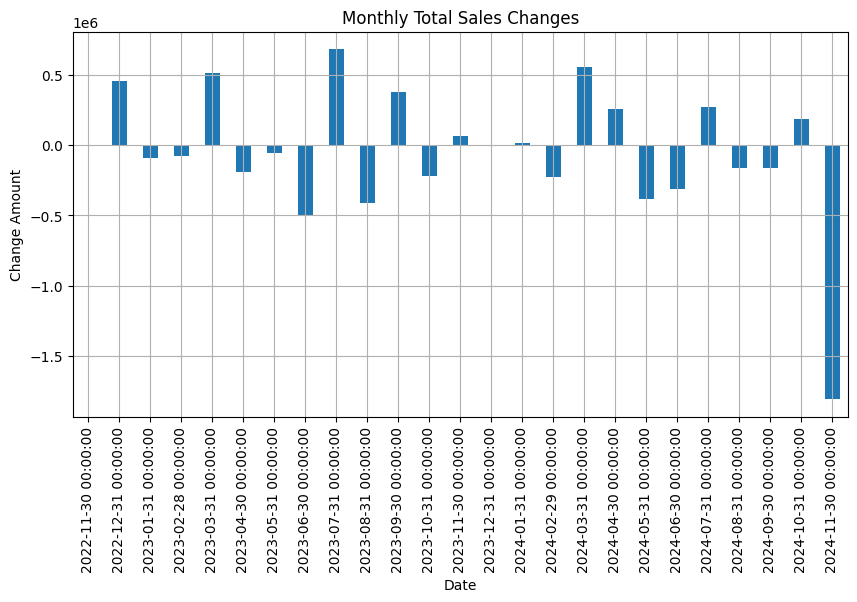

In [121]:
monthly_total_sales_diff.plot(kind="bar", figsize=(10, 5), title="Monthly Total Sales Changes")
plt.ylabel("Change Amount")
plt.xlabel("Date")
plt.grid()
plt.show()

In [122]:
#The percentage change of increase or decrease compared to the previous month for total sales
monthly_total_sales_percentage = monthly_total_sales.pct_change() * 100
print(f"Monthly Total Sales Changes Percentage \n {monthly_total_sales_percentage}")

Monthly Total Sales Changes Percentage 
 tarih
2022-11-30      NaN
2022-12-31    30.36
2023-01-31    -4.69
2023-02-28    -4.32
2023-03-31    28.68
2023-04-30    -8.40
2023-05-31    -2.70
2023-06-30   -24.45
2023-07-31    44.31
2023-08-31   -18.39
2023-09-30    20.92
2023-10-31    -9.82
2023-11-30     3.22
2023-12-31     0.05
2024-01-31     0.81
2024-02-29   -10.82
2024-03-31    30.15
2024-04-30    10.67
2024-05-31   -14.37
2024-06-30   -13.67
2024-07-31    13.71
2024-08-31    -7.38
2024-09-30    -8.03
2024-10-31     9.84
2024-11-30   -86.68
Freq: ME, Name: toplam_satis, dtype: float64


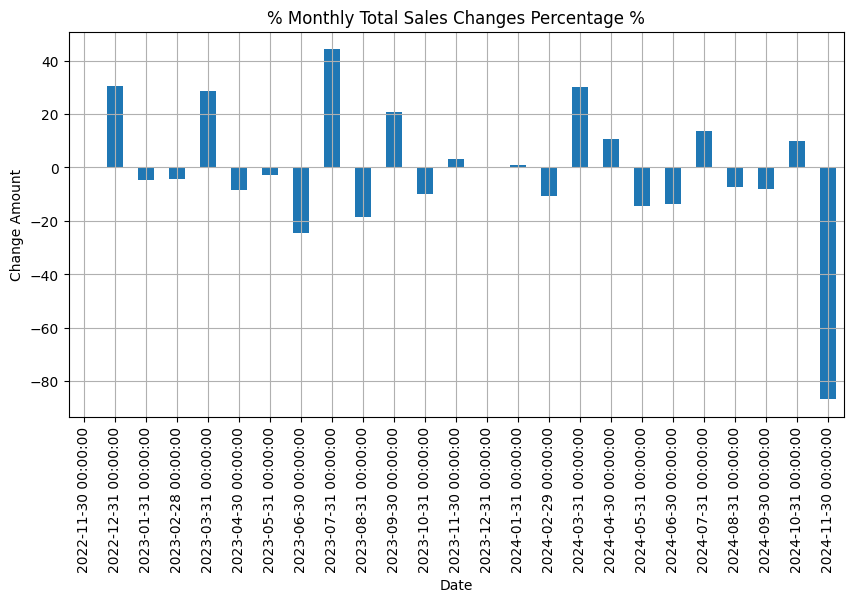

In [123]:
monthly_total_sales_percentage.plot(kind="bar", figsize=(10, 5), title="% Monthly Total Sales Changes Percentage %")
plt.ylabel("Change Amount")
plt.xlabel("Date")
plt.grid()
plt.show()

TASK 3 - Categorical and Numerical Analysis

In [124]:
#Total sales with product category
product_category = sales_data.groupby("kategori")["toplam_satis"].sum()
product_category

kategori
Elektronik        23,834,546.56
Ev Aletleri        4,827,459.13
Giyim              5,152,272.87
Kırtasiye         10,248,699.17
Mutfak Ürünleri    5,037,448.51
Name: toplam_satis, dtype: float64

In [125]:
product_category_percentage = (product_category / product_category.sum()) * 100
product_category_percentage

kategori
Elektronik        48.54
Ev Aletleri        9.83
Giyim             10.49
Kırtasiye         20.87
Mutfak Ürünleri   10.26
Name: toplam_satis, dtype: float64

In [126]:
#Total sales by product category
product_category = sales_data.groupby("kategori")["toplam_satis"].sum()

#The percentace of each category in total sales
product_category_percentage = (product_category / product_category.sum()) * 100

#Display results in a single table
category_table = pd.DataFrame(
    {
    "Total sales by product category": product_category,
    "Percentage of each category": product_category_percentage
    }
)

print(category_table)

                 Total sales by product category  Percentage of each category
kategori                                                                     
Elektronik                         23,834,546.56                        48.54
Ev Aletleri                         4,827,459.13                         9.83
Giyim                               5,152,272.87                        10.49
Kırtasiye                          10,248,699.17                        20.87
Mutfak Ürünleri                     5,037,448.51                        10.26


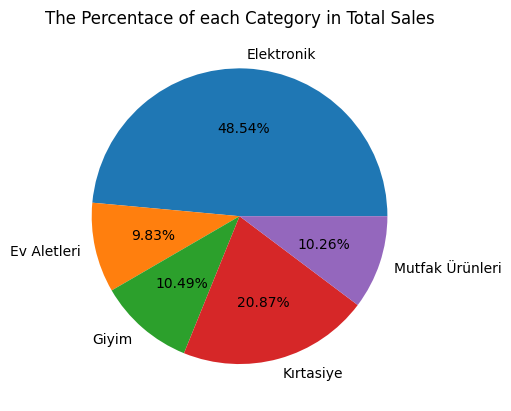

In [127]:
plt.pie(
    category_table["Percentage of each category"], 
    labels=category_table.index, 
    autopct="%1.2f%%"
)

plt.title("The Percentace of each Category in Total Sales")
plt.show()

In [128]:
#Sales trends of customers will be analyzed according to their age groups. 
#Therefore, merged_data was used instead of sales_data.


#First, the minimum and maximum age range limit in the dataset was checked.
min_age = merged_data["yas"].min()
print(f"Minimum age: {min_age}")

max_age = merged_data["yas"].max()
print(f"Maximum age: {max_age}")

Minimum age: 18
Maximum age: 69


In [129]:
bins = [18, 26, 36, 51, 150]    #age groups
labels = ["18-25", "26-35", "36-50", "50+"]

#Split customers by age groups
merged_data["yas"] = pd.cut(merged_data["yas"], bins=bins, labels=labels)

In [130]:
#Total sales amount according to age groups
age_group_sales = merged_data.groupby("yas")["toplam_satis"].sum()

#Product sales amount according to age groups
age_group_product_sales = merged_data.groupby("yas")["adet"].sum()

#Display results in a single table
age_sales_table = pd.DataFrame(
    {
    "Total Sales According to Age Group": age_group_sales,
    "Product Sales According to Age Group": age_group_product_sales
    }
)

age_sales_table

#According to these result, it was observed that the highest sales were over 50 years old.

,Total Sales According to Age Group,Product Sales According to Age Group
yas,,
18-25,"7,356,515.24",7666
26-35,"9,358,321.92",9514
36-50,"14,904,162.45",15133
50+,"16,445,070.89",17076


In [131]:
# Pivot tablo oluşturma
pivot_table = merged_data.pivot_table(
    values="toplam_satis", 
    index="yas", 
    columns="kategori", 
    aggfunc="sum", 
    fill_value=0
)

print(pivot_table)


kategori   Elektronik  Ev Aletleri        Giyim    Kırtasiye  Mutfak Ürünleri
yas                                                                          
18-25    3,689,450.00   756,864.01   660,758.56 1,416,848.19       832,594.47
26-35    4,671,066.31   870,788.96   805,786.15 2,111,311.23       899,369.27
36-50    7,049,252.82 1,421,968.15 1,866,207.85 3,072,387.14     1,494,346.49
50+      7,947,491.15 1,689,199.52 1,646,698.09 3,470,521.31     1,691,160.82


In [132]:
#Total sales amount according to age / category groups
grouped_sales = merged_data.groupby(["yas", "kategori"])["toplam_satis"].sum().reset_index()

#Top category in every age group
top_category_by_age = grouped_sales.loc[grouped_sales.groupby("yas")["toplam_satis"].idxmax()]

print(f"Top Category by Age \n {top_category_by_age}")


Top Category by Age 
       yas    kategori  toplam_satis
0   18-25  Elektronik  3,689,450.00
5   26-35  Elektronik  4,671,066.31
10  36-50  Elektronik  7,049,252.82
15    50+  Elektronik  7,947,491.15


In [133]:
#Total sales by gender
gender_sales = merged_data.groupby("cinsiyet")["toplam_satis"].sum()
print(f"Total Sales by Gender\n{gender_sales}")

Total Sales by Gender
cinsiyet
Erkek   24,523,894.14
Kadın   24,576,532.09
Name: toplam_satis, dtype: float64


In [134]:
#Average spending amount by gender
gender_spending = merged_data.groupby("cinsiyet")["harcama_miktari"].mean()
print(f"Average Spending Amount by Gender\n{gender_spending}")

Average Spending Amount by Gender
cinsiyet
Erkek   2,571.32
Kadın   2,610.13
Name: harcama_miktari, dtype: float64


In [135]:
#Total sales by gender and category

#Since there were multi index, the results were unstacked to make them easier to read in a table view.
gender_category_sales = merged_data.groupby(["cinsiyet", "kategori"])["toplam_satis"].sum().unstack() 
gender_category_sales

kategori,Elektronik,Ev Aletleri,Giyim,Kırtasiye,Mutfak Ürünleri
cinsiyet,,,,,
Erkek,"11,471,941.59","2,286,605.65","2,809,425.48","5,447,851.89","2,508,069.53"
Kadın,"12,362,604.96","2,540,853.48","2,342,847.38","4,800,847.27","2,529,378.98"


In [136]:
#Total sales by gender and age
gender_age_sales = merged_data.groupby(["yas","cinsiyet"])["toplam_satis"].sum().unstack()
gender_age_sales

#According to these results, it seems that women shop more in all age groups.

cinsiyet,Erkek,Kadın
yas,,
18-25,"3,636,993.36","3,719,521.88"
26-35,"4,882,297.44","4,476,024.48"
36-50,"7,256,993.26","7,647,169.18"
50+,"8,244,884.04","8,200,186.84"


In [137]:
#Total product sales quantity by age
gender_product_quantity = merged_data.groupby("cinsiyet")["adet"].sum()
gender_product_quantity

cinsiyet
Erkek    24900
Kadın    25459
Name: adet, dtype: int64

In [138]:
#Total product sales quantity by age and category
gender_product_sales = merged_data.groupby(["cinsiyet", "ürün_adi"])["adet"].sum().unstack()
gender_product_sales

#According to these analyses, the product category that women buy the most is phones. 
#The product that men buy the most is bags.

ürün_adi,Bilgisayar,Defter,Fırın,Kalem,Klima,Kulaklık,Mouse,Su Şişesi,Telefon,Çanta
cinsiyet,,,,,,,,,,
Erkek,2322,2640,2220,2715,2075,2517,2395,2654,2468,2894
Kadın,2263,2562,2613,2585,2609,2421,2666,2605,2776,2359


TASK 4 - Advanced Data Manipulation

In [139]:
#Total spending amount by city
city_spent_amount = merged_data.groupby("sehir")["harcama_miktari"].sum().sort_values(ascending=False)  #ascending=False pattern was used because it was sorted from most to least.
print(f"Total spending amount by city \n{city_spent_amount}")

#Both the total amount of spending and the ranking are clearly visible. Therefore, both analyses were made in a single code.

Total spending amount by city 
sehir
Gaziantep   1,740,073.60
İzmir       1,739,145.40
Bursa       1,665,417.27
Ankara      1,649,167.77
Antalya     1,581,436.54
Konya       1,556,038.91
Adana       1,552,729.00
İstanbul    1,470,821.34
Name: harcama_miktari, dtype: float64


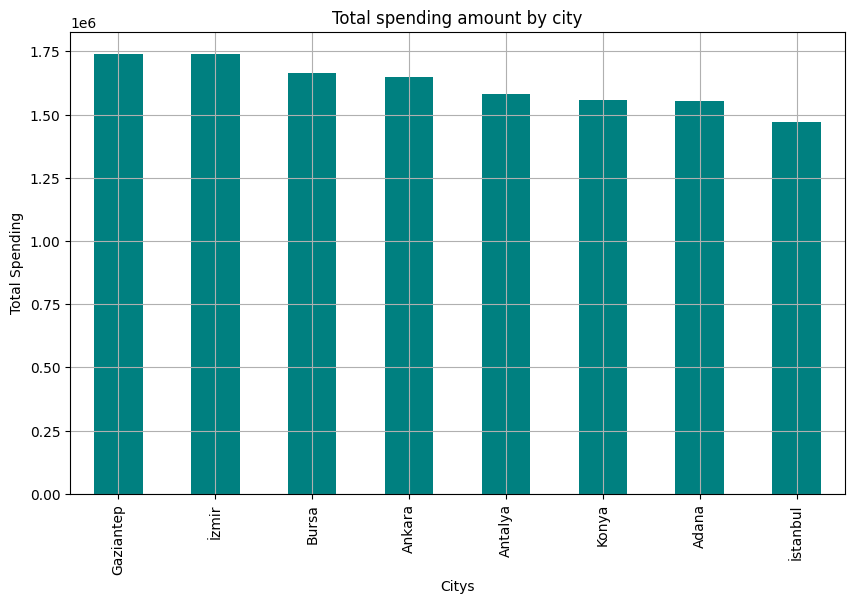

In [147]:
city_spent_amount.head(10).plot(kind="bar", figsize=(10, 6), title="Total spending amount by city", color="teal")
plt.ylabel("Total Spending")
plt.xlabel("Citys")
plt.grid()
plt.show()

In [141]:
#Since the date column was converted to datetime format in Task 2, no format change was made again.
#Monthly groupings were also made in Task 2, but these were not by every product. They were by total sales. Therefore, the variables there were not used here.


#Total monthly sales by product
monthly_product_sales =sales_data.groupby([sales_data["tarih"].dt.to_period("M"), "ürün_adi"])["adet"].sum().unstack()
monthly_product_sales

#There is only one product code representing each product. 
#Therefore, the product name was preferred instead of the product code to make the table more easily understandable.

ürün_adi,Bilgisayar,Defter,Fırın,Kalem,Klima,Kulaklık,Mouse,Su Şişesi,Telefon,Çanta
tarih,,,,,,,,,,
2022-11,116,211,140,149,149,120,139,153,273,168
2022-12,170,279,272,218,199,199,231,217,236,168
2023-01,216,168,242,273,236,153,281,159,228,261
2023-02,83,120,252,317,192,139,258,247,189,206
2023-03,285,248,185,248,188,289,175,190,163,239
2023-04,217,185,201,218,204,132,171,269,218,235
2023-05,189,207,116,158,215,177,242,202,190,313
2023-06,204,139,119,58,101,174,136,167,245,164
2023-07,190,218,263,240,200,230,201,210,325,183


In [149]:
#Monthly sales change percentage
monthly_product_sales_change_percentage = monthly_product_sales.pct_change() * 100
monthly_product_sales_change_percentage

ürün_adi,Bilgisayar,Defter,Fırın,Kalem,Klima,Kulaklık,Mouse,Su Şişesi,Telefon,Çanta
tarih,,,,,,,,,,
2022-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-12,46.55,32.23,94.29,46.31,33.56,65.83,66.19,41.83,-13.55,0.00
2023-01,27.06,-39.78,-11.03,25.23,18.59,-23.12,21.65,-26.73,-3.39,55.36
2023-02,-61.57,-28.57,4.13,16.12,-18.64,-9.15,-8.19,55.35,-17.11,-21.07
2023-03,243.37,106.67,-26.59,-21.77,-2.08,107.91,-32.17,-23.08,-13.76,16.02
2023-04,-23.86,-25.40,8.65,-12.10,8.51,-54.33,-2.29,41.58,33.74,-1.67
2023-05,-12.90,11.89,-42.29,-27.52,5.39,34.09,41.52,-24.91,-12.84,33.19
2023-06,7.94,-32.85,2.59,-63.29,-53.02,-1.69,-43.80,-17.33,28.95,-47.60
2023-07,-6.86,56.83,121.01,313.79,98.02,32.18,47.79,25.75,32.65,11.59


In [143]:
#Average sales growth rate for each product
average_monthly_product_sales_change = monthly_product_sales_change_percentage.mean()
average_monthly_product_sales_change

ürün_adi
Bilgisayar   16.17
Defter        9.21
Fırın         5.44
Kalem        11.63
Klima         2.13
Kulaklık      6.58
Mouse         4.52
Su Şişesi     2.10
Telefon      -2.02
Çanta         4.62
dtype: float64

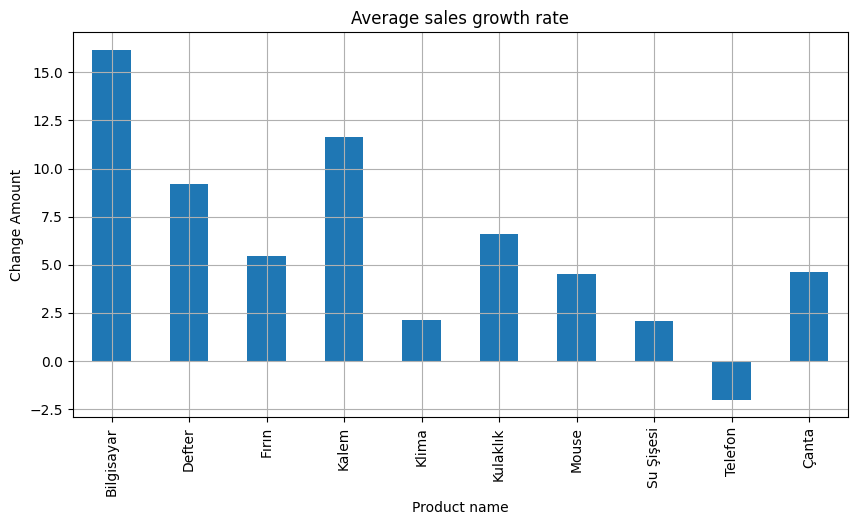

In [ ]:
average_monthly_product_sales_change.plot(kind="bar", figsize=(10, 5), title="Average sales growth rate")
plt.ylabel("Change Amount")
plt.xlabel("Product name")
plt.grid()
#In this section the date column is converted to datetime because this was not done before in merged_data. It was done in sales_data.plt.show()

In [ ]:
#In this section the date column is converted to datetime because this was not done before in merged_data. It was done in sales_data.
merged_data["tarih"] = pd.to_datetime(merged_data["tarih"])

#Monthly total sales by category
monthly_category_sales = merged_data.groupby([merged_data["tarih"].dt.to_period("M"), "kategori"])["toplam_satis"].sum().unstack()

monthly_category_sales

In [ ]:
#Monthly category sales change percentage
monthly_category_sales_change = monthly_category_sales.pct_change() * 100

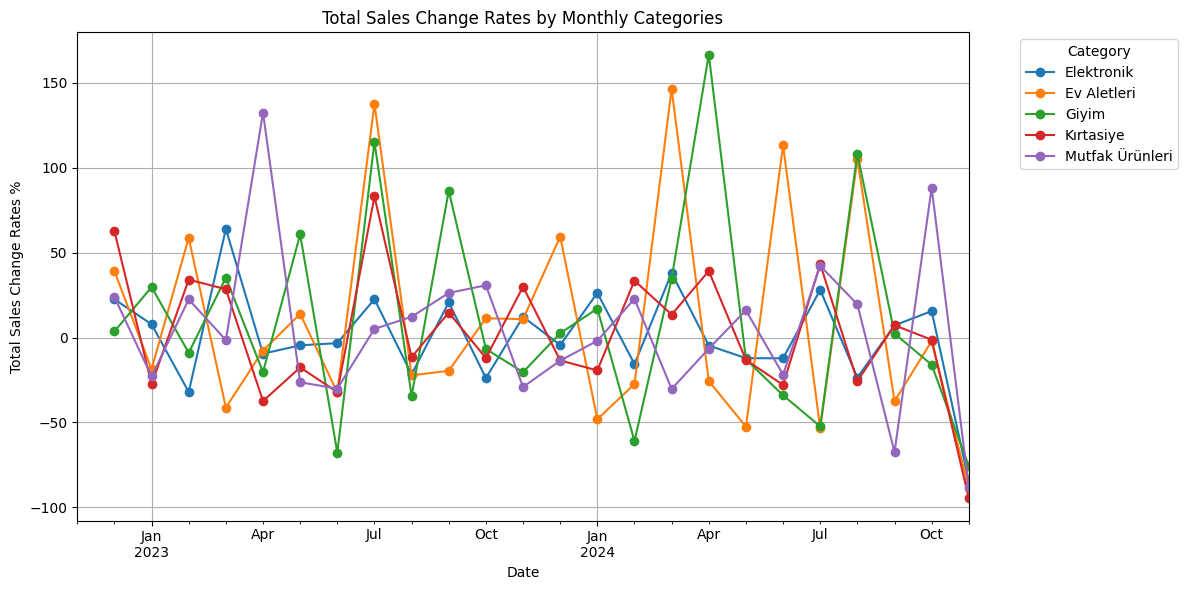

In [186]:

monthly_category_sales_change.plot(kind='line', figsize=(12, 6), marker='o')
plt.title("Total Sales Change Rates by Monthly Categories")
plt.xlabel("Date")
plt.ylabel("Total Sales Change Rates %")
plt.legend(title="Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.tight_layout()
plt.show()


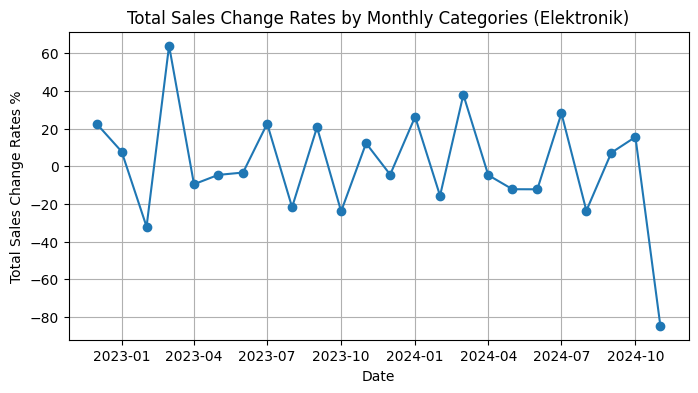

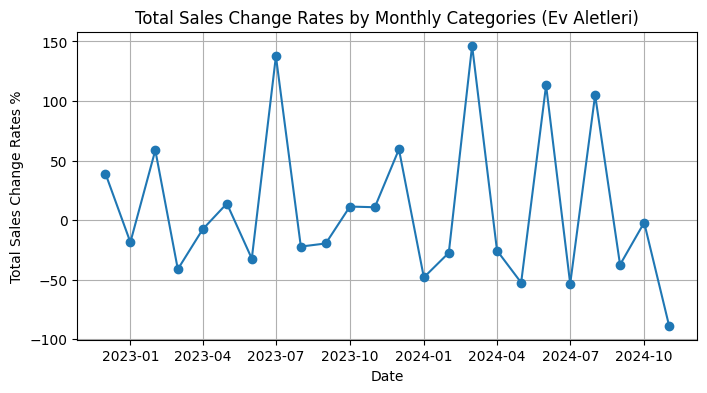

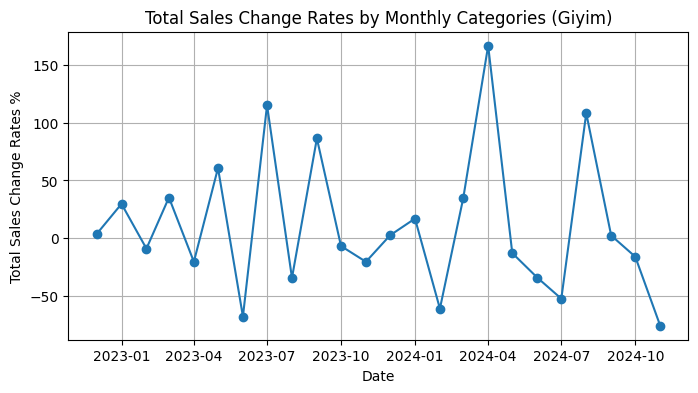

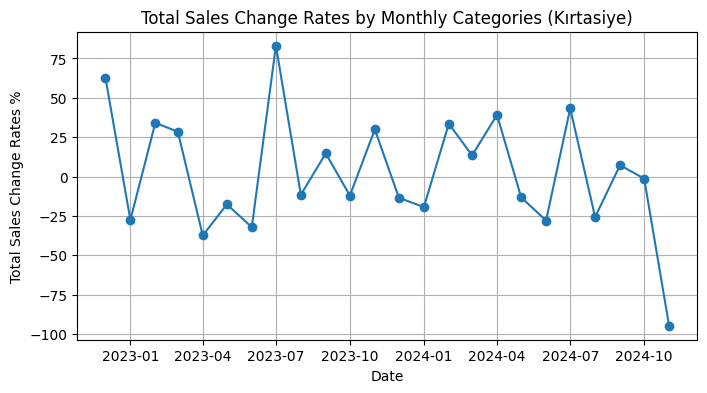

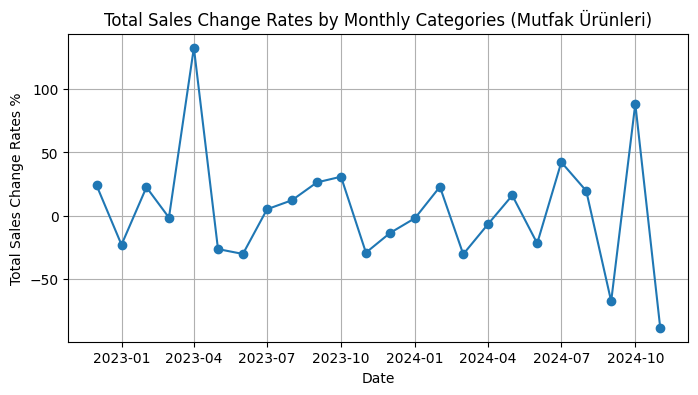

In [190]:
#Different graphs were drawn for each category to make the graph more readable.
#monthly_category_sales_change.index = monthly_category_sales_change.index.to_timestamp()

categories = monthly_category_sales_change.columns

for category in categories:
    plt.figure(figsize=(8, 4))  
    plt.plot(
        monthly_category_sales_change.index,
        monthly_category_sales_change[category],
        marker='o', label=category
    )
    plt.title(f"Total Sales Change Rates by Monthly Categories ({category})")
    plt.xlabel("Date")
    plt.ylabel("Total Sales Change Rates %")
    plt.grid()
    plt.show()
